In [ ]:
# from google.colab import drive
# drive.mount('/content/drive/')

In [ ]:
# import sys
# import os
# py_file_location = "/content/drive/MyDrive/liver-imaging-analysis/engine"
# sys.path.append(os.path.abspath(py_file_location))
# !pip install monai
# !pip install -U scikit-image



In [ ]:
!pip install torchvision
!pip install torch
!pip install matplotlib
!pip install monai
!pip install nibabel
!pip install -U scikit-learn scipy matplotlib
!pip install -U numpy 


In [ ]:
import torch

In [1]:
import unet
import nibabel
import engine
import torch
import json
from torch import nn
import diceloss
from torch.utils.tensorboard import SummaryWriter

device = "cuda" if torch.cuda.is_available() else "cpu"
# device= "cpu"
class NeuralNetwork(unet.UNet3D,engine.Engine):
    def __init__(self):
        engine.Engine.__init__(self,device=device)        
        unet.UNet3D.__init__(self,1,1,device=device)


with open('configs.json') as f:
    config = json.load(f)
tb = SummaryWriter()

model=NeuralNetwork().to(device)

#losses.LossFunctions.choose(config['loss_function']
#nn.BCEWithLogitsLoss()
model.compile(loss=diceloss.DiceLoss(), optimizer= torch.optim.Adam(model.parameters(),lr=config['optimizer']['learning_rate']), metrics=['dice_score','loss'])
# print("Compile Status")
# print("-------------------------------")
# model.compile_status()

model.load_data(training_datasetPath=config['dataset']['training'],testing_datasetPath=config['dataset']['testing'],transformation_flag=True,
                  transformation=config['transformation_size'],batchsize=config['batch_size'],test_valid_split=0)
print("\nData Status")
print("-------------------------------")
model.data_status()
model.load_checkpoint(config['model checkpoint'])
# model.load_state_dict(torch.load("C:/Users/Tarek/Documents/GitHub/liver-imaging-analysis/liver-imaging-analysis/engine/final epoch",map_location=torch.device('cpu')))
print("\nTraining")
print("-------------------------------")
model.fit(epochs=config['epochs'])
# print("\nTesting")

print("-------------------------------")

# print("\nPrediction")
# print("-------------------------------")
# ImagePath=config['ImagePath']
# output=model.predict(ImagePath)
# output.shape


c:\Users\Tarek\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


D:/Data/

Data Status
-------------------------------
volume path: D:/Data/volume\volume-4.nii mask path: D:/Data/mask\segmentation-4.nii
Batch Shape of Training Features: (1, 1, 64, 64, 32) torch.float32
Batch Shape of Training Labels: (1, 1, 64, 64, 32) torch.float32
volume path: D:/Data/volume\volume-4.nii mask path: D:/Data/mask\segmentation-4.nii
Batch Shape of Testing Features: (1, 1, 64, 64, 32) torch.float32
Batch Shape of Testing Labels: (1, 1, 64, 64, 32) torch.float32
Used Device: cpu

Training
-------------------------------
Epoch 1
-------------------------------
volume path: D:/Data/volume\volume-4.nii mask path: D:/Data/mask\segmentation-4.nii
loss: 0.999585        [    1/    4]
volume path: D:/Data/volume\volume-5.nii mask path: D:/Data/mask\segmentation-5.nii
loss: 0.695747        [    2/    4]
volume path: D:/Data/volume\volume-6.nii mask path: D:/Data/mask\segmentation-6.nii
loss: 0.530329        [    3/    4]
volume path: D:/Data/volume\volume-7.nii mask path: D:/Da

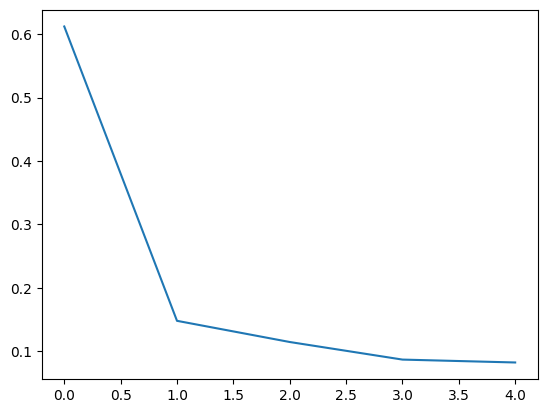

In [3]:
model.save_checkpoint("TESTT")
import matplotlib.pyplot as plt
plt.plot(model.totalloss)

In [4]:
model.evaluate_test()

volume path: D:/Data/volume\volume-4.nii mask path: D:/Data/mask\segmentation-4.nii
volume path: D:/Data/volume\volume-5.nii mask path: D:/Data/mask\segmentation-5.nii
volume path: D:/Data/volume\volume-6.nii mask path: D:/Data/mask\segmentation-6.nii
volume path: D:/Data/volume\volume-7.nii mask path: D:/Data/mask\segmentation-7.nii
Test loss: 0.927520
Test Dice Score: 0.072480
